# 9B. Sea Ice Supplementary
## _Explore the Sea Ice Data_

<div style="text-align: right">
<p>
    <img src="https://pcmdi.github.io/assets/PCMDI/199x65px-PCMDI-Logo-Text-rectangle.png"
         width="91"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Program for Climate Model Diagnosis and Intercomparison"
         alt="Program for Climate Model Diagnosis and Intercomparison"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/LLNL/212px-LLNLiconPMS286-WHITEBACKGROUND.png"
         width="30"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Lawrence Livermore National Laboratory"
         alt="Lawrence Livermore National Laboratory"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/DOE/459x127px-DOE-Logo_Color_TextOnly.png"
         width="108"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="United States Department of Energy"
         alt="United States Department of Energy"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/ESGF2-US/390x202px-ESGF2-US_logo_transparent_word-crop.png"
         width="57"
         height="30"
         class="fixed-height-image"
         style="margin-right: 25px"
         title="Earth System Grid Federation 2 - US Consortium"
         alt="Earth System Grid Federation 2 - US Consortium"
    >
</p>
</div>

<a class="anchor" id="top"></a>

**Summary**  

In this notebook, we are going to explore the dataset used for the [PMP Sea Ice demo notebook](Demo_9_seaIceExtent_ivanova.ipynb). Let's explore the sea ice data for fun!


**Notebook Authors**: Jiwoo Lee, Ana Ordonez, Paul Durack, Peter Gleckler ([PCMDI](https://pcmdi.llnl.gov/), [Lawrence Livermore National Laboratory](https://www.llnl.gov/))

---

**Table of Contents**

Note: Links to the sections work best when viewing this notebook via [nbviewer](https://nbviewer.org/github/PCMDI/pcmdi_metrics/blob/main/doc/jupyter/Demo/Demo_9b_seaIce_data_explore.ipynb).

- [1. Environment setup](Demo_9b_seaIce_data_explore.ipynb#env)

- [2. Model Data](Demo_9b_seaIce_data_explore.ipynb#model)

  * [2.1 Load data](Demo_9b_seaIce_data_explore.ipynb#model_load)

    - [2.1.1 Open dataset](Demo_9b_seaIce_data_explore.ipynb#model_open_ds)

    - [2.1.2 Visualize the data](Demo_9b_seaIce_data_explore.ipynb#model_vis)

  * [2.2 Sea ice extent](Demo_9b_seaIce_data_explore.ipynb#model_sie)

- [3. Reference Data](Demo_9b_seaIce_data_explore.ipynb#obs)

  * [3.1 Load data](Demo_9b_seaIce_data_explore.ipynb#obs_load)

    - [3.1.1 Open Reference Dataset for Arctic](Demo_9b_seaIce_data_explore.ipynb#obs_open_ds1)

    - [3.1.2 Open Reference Dataset for Antartica](Demo_9b_seaIce_data_explore.ipynb#obs_open_ds2)

  * [3.2 Sea ice extent](Demo_9b_seaIce_data_explore.ipynb#obs_sie)

- [4. Diagnostics: Climatology Annual Cycle](Demo_9b_seaIce_data_explore.ipynb#diags)

- [5. Evaluation Metrics](Demo_9b_seaIce_data_explore.ipynb#metric)

  * [5.1 Mean Square Error (Annual Mean)](Demo_9b_seaIce_data_explore.ipynb#mse)

  * [5.2 Temporal Mean Square Error (Annual Cycle)](Demo_9b_seaIce_data_explore.ipynb#tmse)

---

## 1. Environment setup <a class="anchor" id="env"></a>

We will use multiple libraries for this analysis.

- [xCDAT](https://xcdat.readthedocs.io): an open source Python tool built to make climate data analysis easy. [xCDAT](https://xcdat.readthedocs.io) is an extension of [xarray](https://xarray.dev/) for data analysis on structured grids.
- [numpy](https://numpy.org): a dependency required to manage n-dimensional array data.
- [matplotlib](https://matplotlib.org/) and [cartopy](https://scitools.org.uk/cartopy/docs/latest/): required for data visualization.

In [1]:
import xcdat as xc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

## 2. Model Data <a class="anchor" id="model"></a>

### 2.1 Load data <a class="anchor" id="model_load"></a>

#### 2.1.1 Open dataset <a class="anchor" id="model_open_ds"></a>

This demo uses one of the numerous CMIP6 models -- E3SM-1-0. The Sea-Ice Area Percentage (Ocean Grid; 'siconc') and Grid-Cell Area for Ocean Variables ('areacello') variables are needed and can be found in the directories listed below. In addition, six other models are available that can augment the analyses in this demo:
```
/p/user_pub/pmp/demo/sea-ice/links_siconc
/p/user_pub/pmp/demo/sea-ice/links_area
```

This data can be found from ESGF (https://esgf-node.llnl.gov/). 
- e.g., Search query: https://aims2.llnl.gov/search?project=CMIP6&activeFacets={"experiment_id":"historical","variable_id":"siconc"}

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

In [2]:
!ls /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc

siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_185001-185912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_186001-186912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_187001-187912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_188001-188912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_189001-189912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_190001-190912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_191001-191912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_192001-192912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_193001-193912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_194001-194912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_195001-195912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_196001-196912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_197001-197912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_198001-198912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_199001-199912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_200001-200912.nc
siconc_S

In [3]:
!ls /p/user_pub/pmp/demo/sea-ice/links_area/E3SM-1-0/

areacello_Ofx_E3SM-1-0_historical_r1i1p1f1_gr.nc


In [4]:
# Load model dataset
ds = xc.open_mfdataset(
    "/p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_*_*.nc"
)
area = xc.open_dataset(
    "/p/user_pub/pmp/demo/sea-ice/links_area/E3SM-1-0/areacello_Ofx_E3SM-1-0_historical_r1i1p1f1_gr.nc"
)

2024-02-09 12:08:07,978 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


See what is in the dataset:

In [5]:
ds

<xarray.Dataset>
Dimensions:    (time: 1944, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    type       |S7 b'sea_ice'
  * time       (time) object 1850-01-16 12:00:00 ... 2011-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    siconc     (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    creation_date:          2023-01-30T21:36:30Z
    data contact:           Sam Stevenson (sstevenson@ucsb.edu)
    ...                     ...
    variant_label:          r1i2p2f1
    license:                CMIP6 model data produced by E3SM-Project is lice...
    cmor_version:           3.7.0
    references:             Stevenson, S., Huang, X., Zhao, Y., Di Lorenzo, E...
    version:                v20230811
    branch_time_in_parent:  3560.0

In [6]:
area

<xarray.Dataset>
Dimensions:    (lat: 180, bnds: 2, lon: 360)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    areacello  (lat, lon) float32 ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    creation_date:          2021-01-28T04:40:15Z
    ...                     ...
    title:                  E3SM-1-0 output prepared for CMIP6
    tracking_id:            hdl:21.14100/aaa3a5b2-c4c4-4bf6-b7a3-b59915926fc0
    variable_id:            areacello
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by E3SM is licensed und...
    cmor_version:           3.6.0

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

#### 2.1.2 Visualize the data <a class="anchor" id="model_vis"></a>

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

##### a. Quick look


Let's take a quick look at a single timestep of the data:

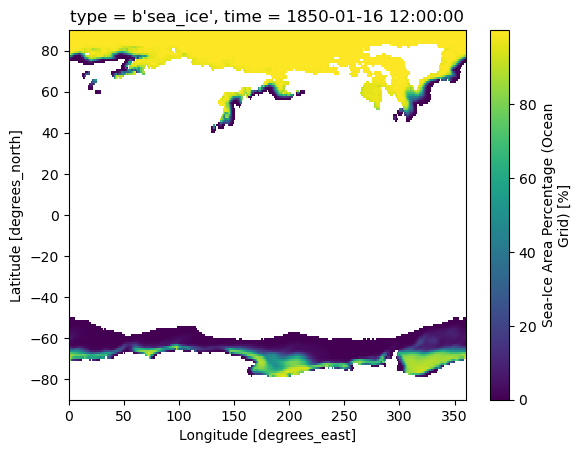

In [7]:
ds["siconc"].isel(time=0).plot()

In [8]:
ds["siconc"].isel(time=0).to_numpy()

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [99.87347 , 99.88154 , 99.88288 , ..., 99.86003 , 99.861336,
        99.86454 ],
       [99.656136, 99.65681 , 99.657486, ..., 99.655624, 99.65451 ,
        99.65535 ],
       [99.54839 , 99.55058 , 99.554344, ..., 99.54922 , 99.54881 ,
        99.54852 ]], dtype=float32)

##### b. Snapshot on map

Viewing the same data from another angle:
- Example mapping scripts are adapted and revised from https://docs.xarray.dev/en/latest/user-guide/plotting.html#maps.

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

In [9]:
from cartopy.feature import LAND as cartopy_land
from cartopy.feature import OCEAN as cartopy_ocean

Text(0.5, 1.0, 'sea ice concentration over the Arctic region')

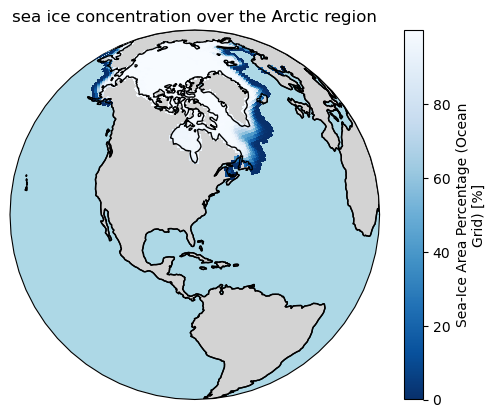

In [10]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))

ax.set_global()

# Color over the ocean
ax.add_feature(cartopy_ocean, zorder=1, edgecolor="none", facecolor="lightblue")

# Data
ds["siconc"].isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap="Blues_r", zorder=3)

# Color over the land
ax.add_feature(cartopy_land, zorder=2, edgecolor="k", facecolor="lightgrey")

# Add coastlines
ax.coastlines(color="black", zorder=4)

ax.set_title("sea ice concentration over the Arctic region")

Let's plot the data using another angle, zooming in on the Arctic region:

Additional matplotlib colorshemes can be found [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

Text(0.5, 1.0, 'sea ice concentration over the Arctic region')

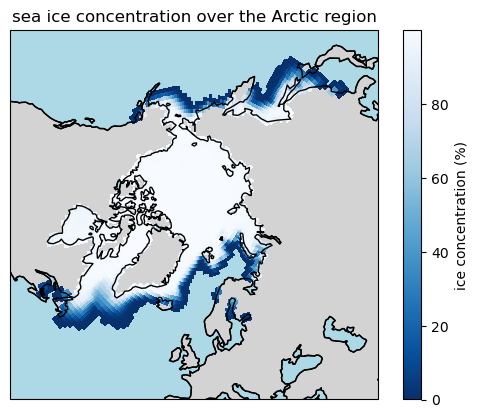

In [11]:
# Generate a map
proj = ccrs.NorthPolarStereo()
ax = plt.subplot(111, projection=proj)
ax.set_global()

# Color over the ocean
ax.add_feature(cartopy_ocean, zorder=1, edgecolor="none", facecolor="lightblue")

# Color over the land
ax.add_feature(cartopy_land, zorder=2, edgecolor="k", facecolor="lightgrey")

# Data
ds["siconc"].isel(time=0).plot.pcolormesh(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="Blues_r",
    cbar_kwargs={"label": "ice concentration (%)"},
    zorder=3,
)

# Add coastlines
ax.coastlines(color="black", zorder=4)

ax.set_extent([-180, 180, 43, 90], ccrs.PlateCarree())
ax.set_title("sea ice concentration over the Arctic region")

##### c. See the data evolving in time

Arctic:

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

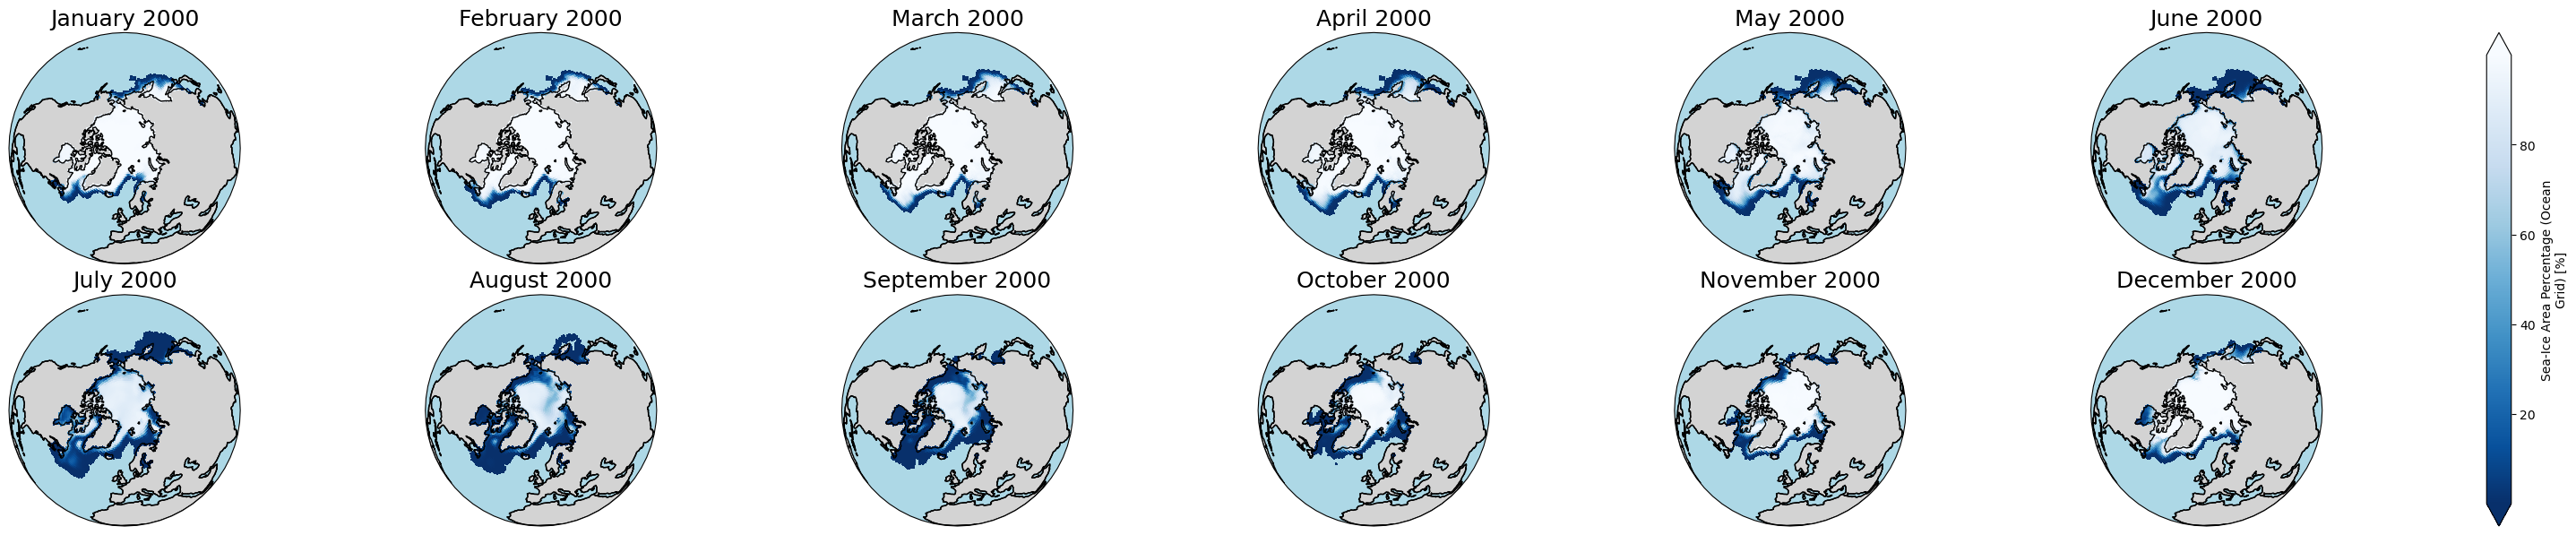

In [12]:
proj_plot = ccrs.Orthographic(0, 90)

years_to_show = [2000]  # You can edit this to check another year(s). It could include multiple years, e.g., [2000, 2001, 2002]


p = ds['siconc'].sel(time = ds.time.dt.year.isin(years_to_show)).plot(x='lon', y='lat', 
                                                                 transform=ccrs.PlateCarree(),
                                                                 aspect=ds.sizes["lon"] / ds.sizes["lat"],  # for a sensible figsize
                                                                 subplot_kws={"projection": proj_plot},
                                                                 col='time', col_wrap=6, robust=True, cmap='Blues_r', zorder=3)

# We have to set the map's options on all four axes
for ax,i in zip(p.axs.flat,  ds.time.sel(time = ds.time.dt.year.isin(years_to_show)).values):
    ax.set_title(i.strftime("%B %Y"), fontsize=18)
    # Color over the ocean
    ax.add_feature(cartopy_ocean, zorder=1, edgecolor="none", facecolor="lightblue")
    # Color over the land
    ax.add_feature(cartopy_land, zorder=2, edgecolor="k", facecolor="lightgrey")
    # Draw coastlines
    ax.coastlines(zorder=4)

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

Antartic:

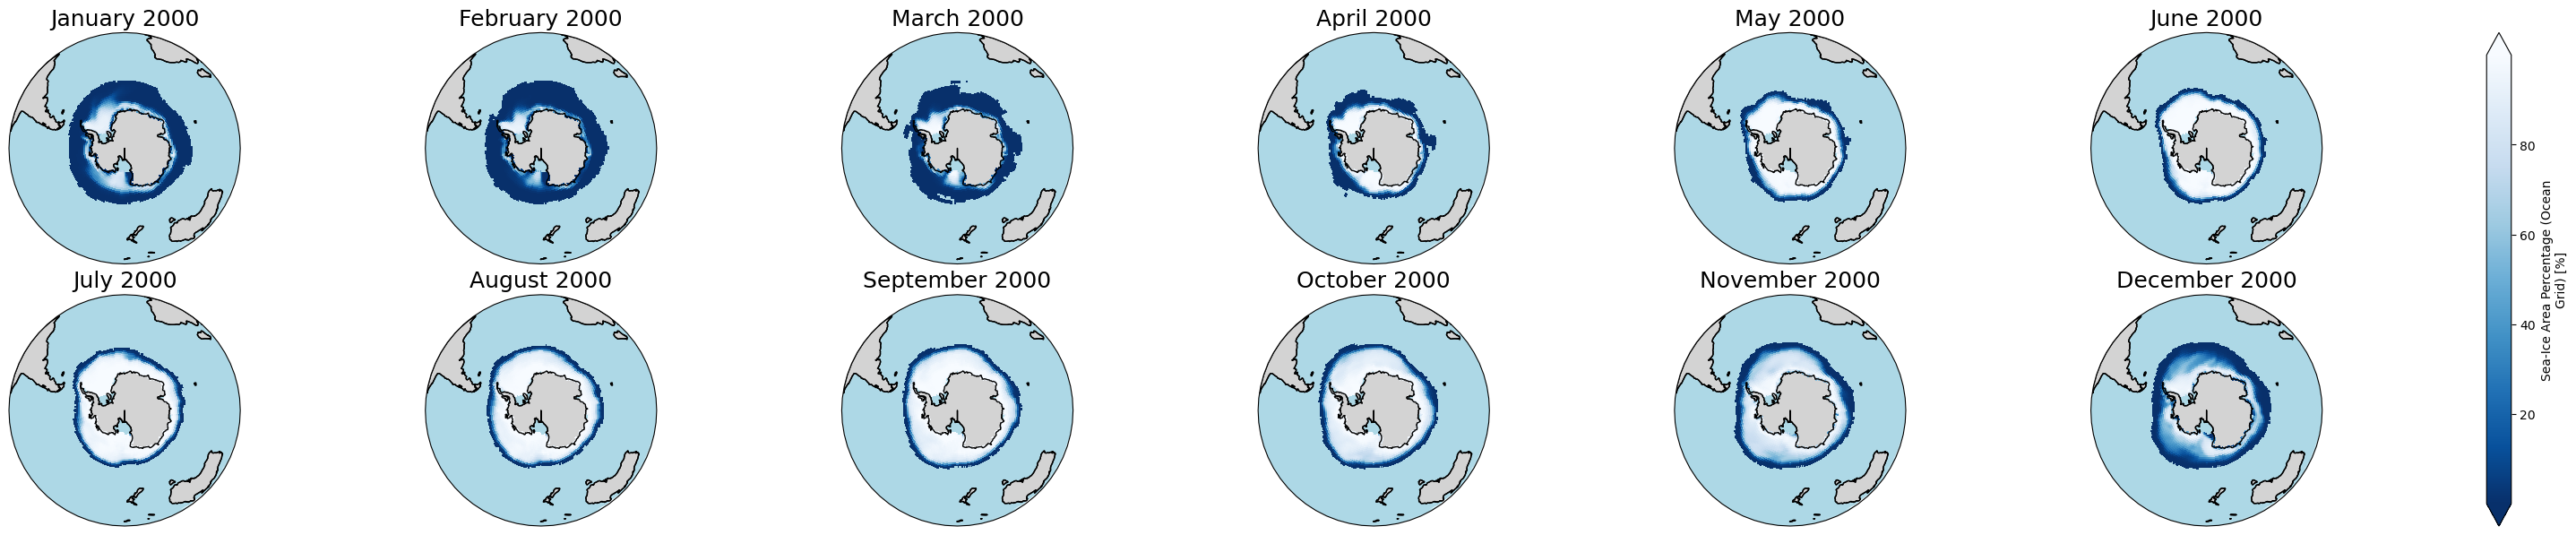

In [13]:
proj_plot = ccrs.Orthographic(0, -90)

#years_to_show = [2000]  # You can uncomment and edit this to check another year(s). It could include multiple years, e.g., [2000, 2001, 2002]

p = ds['siconc'].sel(time = ds.time.dt.year.isin(years_to_show)).plot(x='lon', y='lat', 
                                                                 transform=ccrs.PlateCarree(),
                                                                 aspect=ds.sizes["lon"] / ds.sizes["lat"],  # for a sensible figsize
                                                                 subplot_kws={"projection": proj_plot},
                                                                 col='time', col_wrap=6, robust=True, cmap='Blues_r', zorder=3)

# We have to set the map's options on all four axes
for ax,i in zip(p.axs.flat,  ds.time.sel(time = ds.time.dt.year.isin(years_to_show)).values):
    ax.set_title(i.strftime("%B %Y"), fontsize=18)
    # Color over the ocean
    ax.add_feature(cartopy_ocean, zorder=1, edgecolor="none", facecolor="lightblue")
    # Color over the land
    ax.add_feature(cartopy_land, zorder=2, edgecolor="k", facecolor="lightgrey")
    # Draw coastlines
    ax.coastlines(zorder=4)

### 2.2 Sea ice extent <a class="anchor" id="model_sie"></a>

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

Below, we will calculate the sea ice extent from sea ice concentration.

In [14]:
sea_ice_extent = (ds.siconc.where(ds.lat > 0) * 1e-2 * area.areacello * 1e-6).where(ds.siconc > 15).sum(("lat", "lon"))

Note for the above line
- where siconc > 15: to consider sea ice extent instead of total sea ice area
- multiply 1e-2: to convert percentage (%) to fraction

To learn more about the sea ice extent, see this [article](https://nsidc.org/learn/ask-scientist/what-difference-between-sea-ice-area-and-extent) from NSIDC.

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

Visualize the sea ice extent time series:

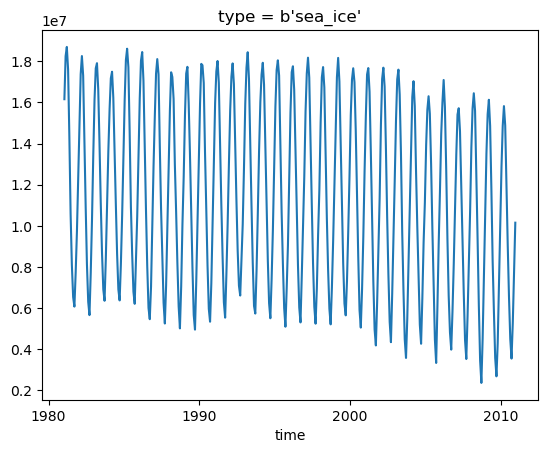

In [15]:
sea_ice_extent.sel({"time": slice("1981-01-01", "2010-12-31")}).plot()

Let's add the `sea_ice_extent` dataArray to the dataset (`ds`) for later use:

In [16]:
ds["extent"] = sea_ice_extent

In [17]:
ds

<xarray.Dataset>
Dimensions:    (time: 1944, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    type       |S7 b'sea_ice'
  * time       (time) object 1850-01-16 12:00:00 ... 2011-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    siconc     (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    extent     (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    creation_date:          2023-01-30T21:36:30Z
    data contact:           Sam Stevenson (sstevenson@ucsb.edu)
    ...                     ...
    variant_label:          r1i2p2f1
    license:                CMIP6 model data produced by E3SM-Project is lice...
    cmor_version:           3.7.0
    references:             Stevenson, S., Huang, X., Zhao, Y., Di Lorenzo, E...
    version:                v20230811
    branch_time_in_parent:  3560.0

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

## 3. Reference Data <a class="anchor" id="obs"></a>

The observational dataset provided is the satellite derived sea ice concentration dataset from EUMETSAT OSI-SAF. More data information can be found at the [osi-450-a product page](https://osi-saf.eumetsat.int/products/osi-450-a). The path to this data is:
```
/p/user_pub/pmp/demo/sea-ice/EUMETSAT
```

This data can be also downloaded via the PMP's [Demo #0 notebook](Demo_0_download_data.ipynb).

### 3.1 Load data <a class="anchor" id="obs_load"></a>

#### 3.1.1 Open Reference Dataset for Arctic <a class="anchor" id="obs_open_ds1"></a>

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

In [18]:
obs_file1 = "/p/user_pub/pmp/demo/sea-ice/EUMETSAT/OSI-SAF-450-a-3-0/v20231201/ice_conc_nh_ease2-250_cdr-v3p0_198801-202012.nc"
obs_ds = xc.open_dataset(obs_file1)

In [19]:
obs_ds

<xarray.Dataset>
Dimensions:                 (xc: 432, yc: 432, time: 396, nv: 2, bnds: 2)
Coordinates:
  * xc                      (xc) float64 -5.388e+03 -5.362e+03 ... 5.388e+03
  * yc                      (yc) float64 5.388e+03 5.362e+03 ... -5.388e+03
    lat                     (yc, xc) float32 16.62 16.82 17.02 ... 16.82 16.62
    lon                     (yc, xc) float32 -135.0 -135.1 -135.3 ... 44.87 45.0
  * time                    (time) object 1988-01-16 12:00:00 ... 2020-12-16 ...
Dimensions without coordinates: nv, bnds
Data variables:
    Lambert_Azimuthal_Grid  int32 ...
    ice_conc                (time, yc, xc) float64 ...
    raw_ice_conc_values     (time, yc, xc) float64 ...
    status_flag             (time, yc, xc) float32 ...
    time_bnds               (time, nv) object ...
    xc_bnds                 (xc, bnds) float64 ...
Attributes: (12/43)
    title:                     Monthly Sea Ice Concentration Climate Data Rec...
    summary:                   This climate data record of sea ice concentrat...
    topiccategory:             Oceans ClimatologyMeteorologyAtmosphere
    geospatial_lat_min:        16.62393
    geospatial_lat_max:        90.0
    geospatial_lon_min:        -180.0
    ...                        ...
    algorithm:                 SICCI3LF (19V, 37V, 37H)
    references:                Product User Manual v3 (2022),Algorithm Theore...
    contributor_name:          Thomas Lavergne,Atle Soerensen,Rasmus Tonboe,C...
    contributor_role:          PrincipalInvestigator,author,author,author,aut...
    source:                    FCDR of SMMR / SSMI / SSMIS Brightness Tempera...
    product_status:            released

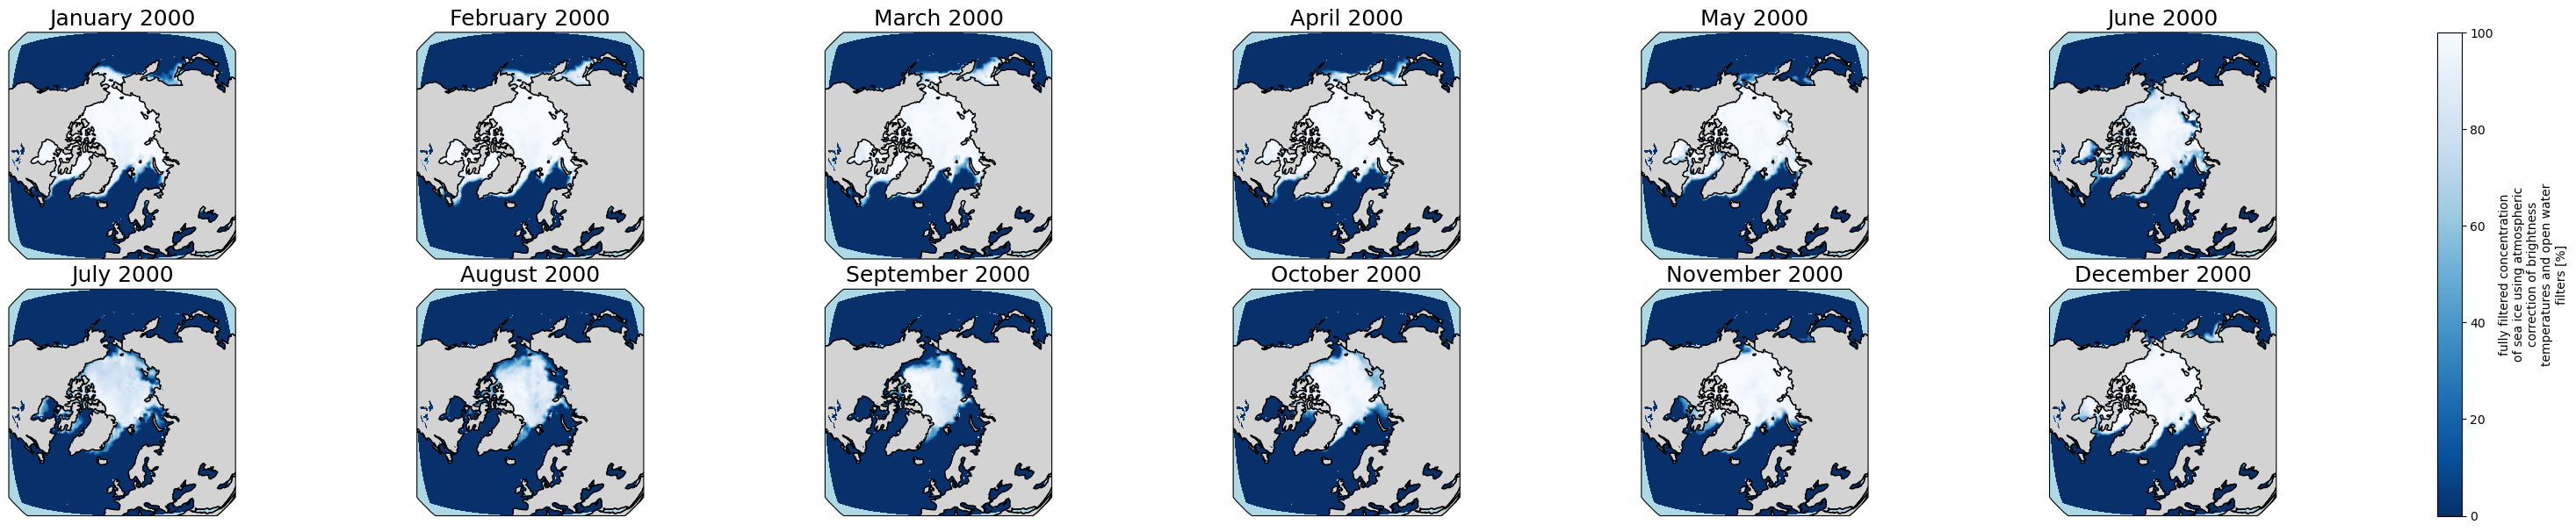

In [20]:
proj_plot = ccrs.Orthographic(0, 90)

#years_to_show = [2000]  # You can uncomment and edit this to check another year(s). It could include multiple years, e.g., [2000, 2001, 2002]

p = obs_ds['ice_conc'].sel(time = obs_ds.time.dt.year.isin(years_to_show)).plot(x='lon', y='lat', 
                                                                 transform=ccrs.PlateCarree(),
                                                                 aspect=ds.dims["lon"] / ds.dims["lat"],  # for a sensible figsize
                                                                 subplot_kws={"projection": proj_plot},
                                                                 col='time', col_wrap=6, robust=True, cmap='Blues_r', zorder=3)

# We have to set the map's options on all four axes
for ax,i in zip(p.axs.flat,  ds.time.sel(time = ds.time.dt.year.isin(years_to_show)).values):
    ax.set_title(i.strftime("%B %Y"), fontsize=18)
    # Color over the ocean
    ax.add_feature(cartopy_ocean, zorder=1, edgecolor="none", facecolor="lightblue")
    # Color over the land
    ax.add_feature(cartopy_land, zorder=2, edgecolor="k", facecolor="lightgrey")
    # Draw coastlines
    ax.coastlines(zorder=4)

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

#### 3.1.2 Open Reference Dataset for Antartica <a class="anchor" id="obs_open_ds2"></a>

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

In [21]:
obs_file2 = "/p/user_pub/pmp/demo/sea-ice/EUMETSAT/OSI-SAF-450-a-3-0/v20231201/ice_conc_sh_ease2-250_cdr-v3p0_198801-202012.nc"
obs_ds2 = xc.open_dataset(obs_file2)

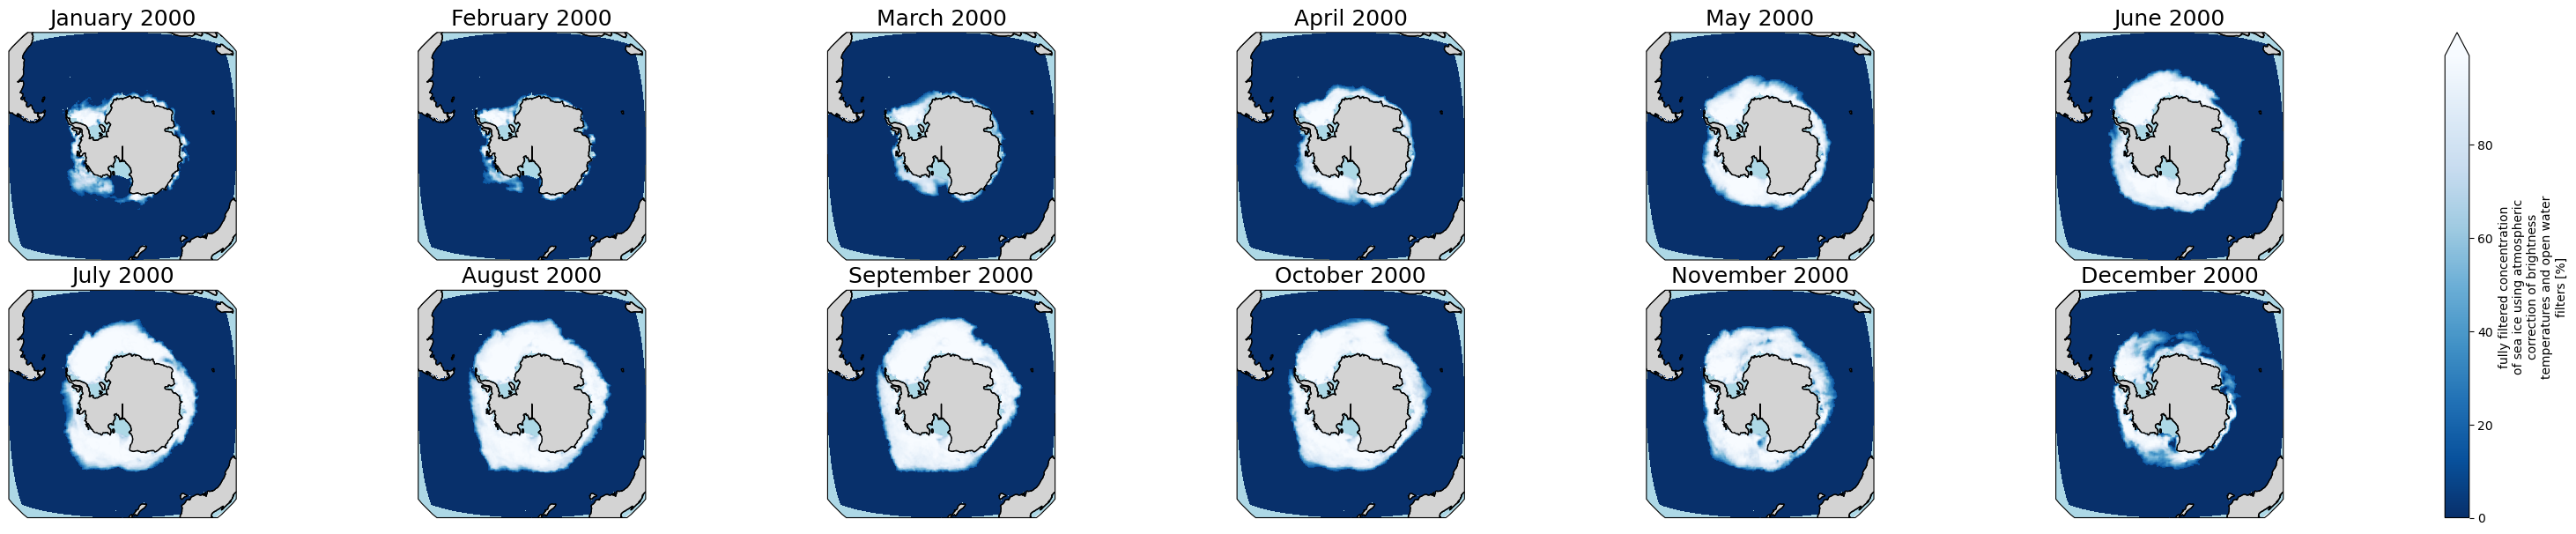

In [22]:
proj_plot = ccrs.Orthographic(0, -90)

#years_to_show = [2000]  # You can uncomment and edit this to check another year(s). It could include multiple years, e.g., [2000, 2001, 2002]

p = obs_ds2['ice_conc'].sel(time = obs_ds2.time.dt.year.isin(years_to_show)).plot(x='lon', y='lat', 
                                                                 transform=ccrs.PlateCarree(),
                                                                 aspect=ds.dims["lon"] / ds.dims["lat"],  # for a sensible figsize
                                                                 subplot_kws={"projection": proj_plot},
                                                                 col='time', col_wrap=6, robust=True, cmap='Blues_r', zorder=3)

# We have to set the map's options on all four axes
for ax,i in zip(p.axs.flat,  ds.time.sel(time = ds.time.dt.year.isin(years_to_show)).values):
    ax.set_title(i.strftime("%B %Y"), fontsize=18)
    # Color over the ocean
    ax.add_feature(cartopy_ocean, zorder=1, edgecolor="none", facecolor="lightblue")
    # Color over the land
    ax.add_feature(cartopy_land, zorder=2, edgecolor="k", facecolor="lightgrey")
    # Draw coastlines
    ax.coastlines(zorder=4)

### 3.2 Sea ice extent <a class="anchor" id="obs_sie"></a>

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

In [23]:
obs_area = 625
obs_sea_ice_extent = (obs_ds.ice_conc.where(obs_ds.lat > 0).where(obs_ds.ice_conc > 15) * 1e-2 * obs_area).sum(("xc", "yc"))

Note for the above lines
- obs_area = 625  # area size represented by each grid (625 km^2 = 25 km x 25 km resolution)
- where ice_conc > 15: to consider sea ice extent instead of total sea ice area
- multiply 1e-2: to convert percentage (%) to fraction

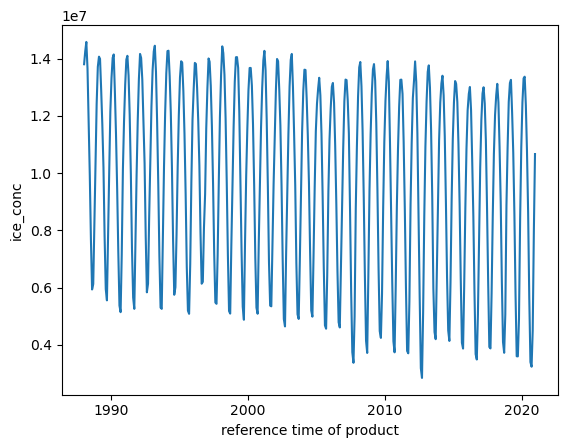

In [24]:
obs_sea_ice_extent.plot()

Let's add the `obs_arctic` dataArray to the dataset (`obs_ds`) for later use:

In [25]:
obs_ds["extent"] = obs_sea_ice_extent

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

## 4. Diagnostics: Climatology Annual Cycle <a class="anchor" id="diags"></a>

Let's analyze the climatology of Sea-Ice extent, focusing on its annual cycle.

We will use [xCDAT](https://xcdat.readthedocs.io)'s [`temporal.climatology`](https://xcdat.readthedocs.io/en/latest/generated/xarray.Dataset.temporal.climatology.html) function to calculate the monthly climatology field. 

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

In [26]:
obs_ds_clim = obs_ds.temporal.climatology(
    "extent", freq="month", reference_period=("1981-01-01", "2010-12-31"))

In [27]:
ds_clim = ds.temporal.climatology(
    "extent", freq="month", reference_period=("1981-01-01", "2010-12-31"))

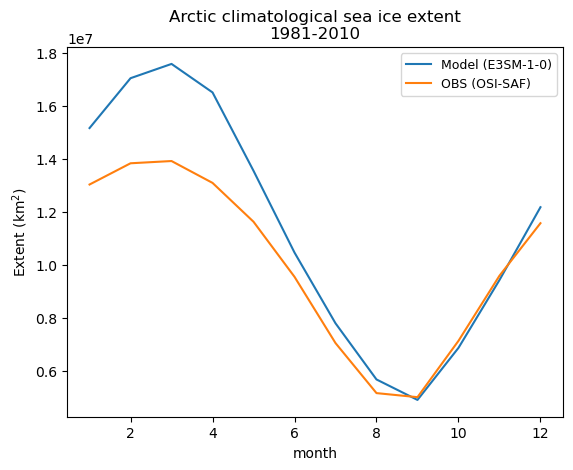

In [28]:
fig, ax = plt.subplots()

# Unify the time axis to plot lines on a same figure
ds_clim["time"] = [x for x in range(1, 13)]
obs_ds_clim["time"] = [x for x in range(1, 13)]

# Add lines
ds_clim["extent"].plot(ax=ax, label="Model (E3SM-1-0)")
obs_ds_clim["extent"].plot(ax=ax, label="OBS (OSI-SAF)")

# Attach legend
plt.title("Arctic climatological sea ice extent\n1981-2010")
plt.xlabel("month")
plt.ylabel("Extent (km${^2}$)")
plt.legend(loc="upper right", fontsize=9)

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

## 5. Evaluation Metrics <a class="anchor" id="metric"></a>

The term "metric" indicates a score or statistics that can represent a model's performance in reproducing observed features. A "metric" can be defined in many different ways, but the primary purpose of metrics is to summarize the performances of many different models and provide a framework for benchmarking model realism.

In this notebook, we define **Mean Square Error (MSE)** and **Temporal MSE** as metrics.

### 5.1 Mean Square Error (Annual Mean) <a class="anchor" id="mse"></a>

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

In [29]:
mse = (ds_clim["extent"].data.mean() - obs_ds_clim["extent"].data.mean()) ** 2 * 1e-12

In [30]:
print(f"Mean Square Error: {float(mse)} 10^12 km^4")

Mean Square Error: 1.9092291476097731 10^12 km^4


### 5.2 Temporal Mean Square Error (Annual Cycle) <a class="anchor" id="tmse"></a>

<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>

In [31]:
tmse = np.sum(((ds_clim["extent"].data - obs_ds_clim["extent"].data) ** 2)) / len(ds_clim["extent"]) * 1e-12

In [32]:
print(f"Temporal Mean Square Error: {float(tmse)} 10^12 km^4")

Temporal Mean Square Error: 3.808760315117328 10^12 km^4


<div align=right>
<a href=Demo_9b_seaIce_data_explore.ipynb#top>Go back to Top</a>
</div>